In [1]:
import requests
from bs4 import BeautifulSoup
import json
import time
from datetime import datetime
from requests.adapters import HTTPAdapter
from urllib3.util import Retry

# --- LISTE DES URLS NETTOYÉE ET COMPLÈTE ---
urls_gaza = [
    # --- Fox News ---
    "https://www.foxnews.com/world/israeli-military-sees-hamas-war-lasting-all-2024-report",
    "https://www.foxnews.com/world/idf-seized-weapons-cache-supplies-hamas-terror-groups-attack-israel",
    "https://www.foxnews.com/world/israeli-defense-forces-release-video-showing-evidence-hamas-weapons-tunnels-linking-hospital-basements",
    "https://www.foxnews.com/world/israeli-troops-enter-al-shifa-hospital-killing-hamas-terrorists-gate-side-firefight",
    "https://www.foxnews.com/world/urban-warfare-expert-says-israeli-military-taking-unprecedented-steps-to-protect-gaza-civilians",
    "https://www.foxnews.com/world/idf-investigating-whether-hamas-chief-yahya-sinwar-killed-gaza-operations",
    "https://www.foxnews.com/world/hamas-command-tunnel-unrwas-headquarters-gaza-israel-says",
    "https://www.foxnews.com/world/anti-hamas-protests-breakout-gaza-strip-over-demands-end-war",
    "https://www.foxnews.com/politics/trump-warns-hamas-war-resume-terror-group-continues-kill-people-gaza",
    "https://www.foxnews.com/world/israel-says-hamas-violated-ceasefire-multiple-attacks-leading-idf-response",
    "https://www.foxnews.com/world/study-disputes-gaza-genocide-charges-finds-flawed-data-amid-hamas-driven-narrative",
    "https://www.foxnews.com/world/ceasefire-over-israel-strikes-gaza-after-hamas-refused-release-hostages-officials-say",
    "https://www.foxnews.com/world/taking-out-hamas-million-dollar-root-tunnel-game-changer-analyst-says",
    "https://www.foxnews.com/world/hamas-hardens-stance-ceasefire-talks-netanyahu-recalls-negotiation-team",
    "https://www.foxnews.com/world/former-hamas-hostage-warned-australian-leaders-about-dangers-antisemitism-months-before-bondi-beach-attack",
    "https://www.foxnews.com/world/hamas-faces-legitimacy-crisis-desperate-gazans-flock-us-backed-aid-centers",
    "https://www.foxnews.com/world/israel-constructs-large-pumps-flood-hamas-terror-tunnels-seawater-wall-street-journal",
    "https://www.foxnews.com/world/gaza-hospital-blast-heres-what-we-know",  # SANS ?msockid
    "https://www.foxnews.com/world/netanyahu-announces-investigation-tragic-mishap-reports-journalists-killed-gaza-strike",  # SANS ?msockid
    
    # --- NOUVELLES URLs FOX NEWS (NETTOYÉES) ---
    "https://www.foxnews.com/world/israel-security-cabinet-approves-plan-occupy-gaza-city",
    "https://www.foxnews.com/world/i-will-be-haunted-forever-israels-horrific-video-hamas-atrocities-leaves-viewers-shocked-sickened",
    "https://www.foxnews.com/world/israel-under-attack-gunmen-kill-injure-tel-aviv",
    "https://www.foxnews.com/world/reporters-notebook-israeli-hostage-families-plead-peace-falters-war-grinds-gaza",
    "https://www.foxnews.com/world/report-exposes-hamas-terrorist-crimes-against-families-during-oct-7-massacre-kinocide",
    "https://www.foxnews.com/world/un-finally-recognizes-israeli-women-raped-sexually-attacked-hamas-terrorists",
    "https://www.foxnews.com/politics/hochul-apologizes-saying-israel-right-defend-itself-inappropriate-canada-analogy",
    "https://www.foxnews.com/world/israel-war-see-photos-video-attack-aftermath",
    "https://www.foxnews.com/world/powerful-israel-backed-clan-leader-fought-hamas-murdered-gaza",
    "https://www.foxnews.com/world/grassroots-push-freedom-grows-gaza-hamas-tightens-its-deadly-grip",
    "https://www.foxnews.com/world/multiple-people-killed-shooting-attack-jerusalem-bus",
    
    # --- BBC ---
    "https://www.bbc.com/news/articles/clyv7w3gdy2o",
    "https://www.bbc.com/news/world-middle-east-67480680",
    "https://www.bbc.com/news/articles/c4gdx1rpel6o",
    "https://www.bbc.com/news/articles/cx2dklj3rxvo",
    "https://www.bbc.com/news/articles/c17x0xjqj21o",
    "https://www.bbc.com/news/articles/c0rvxjnvv71o",
    "https://www.bbc.com/news/articles/cvgn50d9pywo",
    "https://www.bbc.com/news/articles/cr54y0qplgvo",
    "https://www.bbc.com/news/world-middle-east-67401064",
    "https://www.bbc.com/news/world-middle-east-67316463",
    "https://www.bbc.com/news/articles/cjr7l123zy5o",
    "https://www.bbc.com/news/articles/crlzr7ey8rpo",
    "https://www.bbc.com/news/articles/cr5e4ee9r13o",
    "https://www.bbc.com/news/articles/cnvezzdnmrno",
    "https://www.bbc.com/news/articles/czry8g5n80zo",
    "https://www.bbc.com/news/articles/c86wd84y7jyo",
    "https://www.bbc.com/news/articles/c0lk292jww4o",
    "https://www.bbc.com/news/articles/c15wz2ee05do",
    
    # --- The Guardian ---
    "https://www.theguardian.com/world/2025/jan/15/the-devastating-impact-of-15-months-of-war-on-gaza",
    "https://www.theguardian.com/world/2025/oct/07/diplomacy-lowest-point-how-the-israel-gaza-conflict-was-mishandled",
    
    # --- CNN ---
    "https://edition.cnn.com/2023/12/21/middleeast/palestinians-back-hamas-survey-intl-cmd",
    "https://edition.cnn.com/2025/07/30/middleeast/gaza-women-dangers-starvation-children-intl-cmd",
    "https://edition.cnn.com/2025/05/20/middleeast/gaza-hunger-jana-israel-blockade-intl-cmd",
    "https://edition.cnn.com/2025/07/26/middleeast/five-month-old-dies-gaza-starvation-intl",
    "https://edition.cnn.com/2025/03/18/world/israels-strikes-in-gaza-palestinian-children-traumatized",  # NOUVEAU
    
    # --- AP News ---
    "https://apnews.com/article/israel-hamas-gaza-palestinians-war-news-19-12-2025-c5cbf81d48dd1ee82b1fcd2706e7bc7a"
]

corpus_gaza = []

# --- 1. MISE EN PLACE D'UNE STRATÉGIE DE RETRY ---
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
print("=" * 60)
print("DÉBUT DE LA COLLECTE DU CORPUS GAZA")
print(f"Nombre total d'URLs à traiter : {len(urls_gaza)}")
print("=" * 60)

session = requests.Session()
retry_strategy = Retry(
    total=3,  # Réessaye 3 fois max
    backoff_factor=2,  # Attend 2s, 4s, 8s entre les essais
    status_forcelist=[429, 500, 502, 503, 504]  # Codes d'erreurs serveurs classiques
)
adapter = HTTPAdapter(max_retries=retry_strategy)
session.mount("https://", adapter)

# --- 2. BOUCLE PRINCIPALE ---
article_count = 0
error_count = 0
success_count = 0

for index, url in enumerate(urls_gaza, 1):
    try:
        print(f"\n[{index}/{len(urls_gaza)}] Traitement de : {url[:60]}...")
        
        r = session.get(url, headers=headers, timeout=(5, 30))
        
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'html.parser')
            
            # --- 1. Titre ---
            title_tag = soup.find('h1')
            titre = title_tag.get_text(strip=True) if title_tag else "Sans titre"
            
            # --- 2. Détection Source & Nettoyage spécifique ---
            source = "Autre"
            author = "N/A"
            publish_date = "N/A"
            article_body = None
            
            if "foxnews.com" in url:
                source = "Fox News"
                article_body = soup.find('div', class_='article-body')
                author_tag = soup.find('div', class_='author-byline')
                if author_tag:
                    author = author_tag.get_text(strip=True).replace('By ', '')
                date_tag = soup.find('time')
                if date_tag:
                    publish_date = date_tag.get_text(strip=True)
            
            elif "bbc.com" in url:
                source = "BBC"
                article_body = soup.find('article')
                date_tag = soup.find('time')
                if date_tag:
                    publish_date = date_tag.get('datetime')
            
            elif "theguardian.com" in url:
                source = "The Guardian"
                article_body = soup.find('div', class_='article-body-commercial-selector')
                author_tag = soup.find('a', rel='author')
                if author_tag:
                    author = author_tag.get_text(strip=True)
                date_tag = soup.find('time')
                if date_tag:
                    publish_date = date_tag.get('datetime')
            
            elif "cnn.com" in url:
                source = "CNN"
                article_body = soup.find('section', attrs={'data-zone-label': 'bodyText'}) or soup.find('div', class_='article__content')
                if not article_body:
                    article_body = soup.find('div', {'class': 'l-container'})
                date_tag = soup.find('div', class_='timestamp')
                if date_tag:
                    publish_date = date_tag.get_text(strip=True)
            
            elif "apnews.com" in url or "reuters.com" in url:
                source = "AP/Reuters" if "apnews.com" in url else "Reuters"
                article_body = soup.find('article') or soup.find('div', {'role': 'article'})
                date_tag = soup.find('time')
                if date_tag:
                    publish_date = date_tag.get('datetime') or date_tag.get_text(strip=True)
            
            else:
                source = "Autre"
                article_body = soup.find('article')
            
            # --- 3. Extraction du texte ---
            paragraphes = []
            
            if article_body:
                # Essayer d'abord de trouver tous les paragraphes dans le corps
                paragraphes = [p.get_text(strip=True) for p in article_body.find_all('p') 
                              if len(p.get_text(strip=True)) > 50]
                
                # Si on n'a pas trouvé de paragraphes, essayer une méthode alternative
                if len(paragraphes) < 3:
                    text_elements = article_body.find_all(['p', 'div'], 
                        class_=lambda x: x and ('text' in x or 'content' in x or 'paragraph' in x))
                    paragraphes = [elem.get_text(strip=True) for elem in text_elements 
                                  if len(elem.get_text(strip=True)) > 50]
            else:
                # Fallback amélioré
                main_content = soup.find('main') or soup.find('div', {'role': 'main'})
                if main_content:
                    paragraphes = [p.get_text(strip=True) for p in main_content.find_all('p') 
                                  if len(p.get_text(strip=True)) > 50]
                else:
                    # Dernier recours
                    all_paragraphs = soup.find_all('p')
                    for p in all_paragraphs:
                        text = p.get_text(strip=True)
                        if len(text) > 80 and "©" not in text and "cookie" not in text.lower() and "privacy" not in text.lower():
                            paragraphes.append(text)
            
            texte_final = "\n".join(paragraphes)
            
            # --- 4. Ajout au corpus ---
            if len(texte_final) > 100:
                corpus_gaza.append({
                    "source": source,
                    "url": url,
                    "title": titre,
                    "publish_date": publish_date,
                    "author": author,
                    "content": texte_final,
                    "scraped_at": datetime.now().isoformat(),
                    "keywords": [],
                    "summary": "",
                    "conflict": "Gaza"
                })
                article_count += 1
                success_count += 1
                print(f"   ✅ [{article_count}] Succès : {titre[:60]}... ({source})")
            else:
                error_count += 1
                print(f"   ❌ Contenu trop court ou vide pour : {url[:40]}...")
        else:
            error_count += 1
            print(f"   ❌ Erreur {r.status_code} pour l'URL")
        
        # Pause éthique pour respecter le serveur
        time.sleep(3)
    
    except Exception as e:
        error_count += 1
        print(f"   ⚠️  Erreur critique : {str(e)[:80]}")

# --- 3. SAUVEGARDE ---
file_name = 'corpus_gaza.json'
with open(file_name, 'w', encoding='utf-8') as f:
    json.dump(corpus_gaza, f, indent=4, ensure_ascii=False)

print("\n" + "=" * 60)
print("COLLECTE TERMINÉE")
print("=" * 60)
print(f"📊 RÉSULTATS :")
print(f"   • Articles collectés avec succès : {success_count}/{len(urls_gaza)}")
print(f"   • Échecs/erreurs : {error_count}")
print(f"   • Total dans le corpus : {article_count} articles")
print(f"   • Taille du fichier JSON : {file_name}")
print("=" * 60)

# Téléchargement automatique (si vous utilisez Google Colab)
try:
    from google.colab import files
    files.download(file_name)
    print("📥 Fichier téléchargé depuis Google Colab")
except ImportError:
    print(f"📁 Fichier disponible localement : {file_name}")

DÉBUT DE LA COLLECTE DU CORPUS GAZA
Nombre total d'URLs à traiter : 59

[1/59] Traitement de : https://www.foxnews.com/world/israeli-military-sees-hamas-wa...
   ✅ [1] Succès : Israeli military sees Hamas war lasting through all of 2024:... (Fox News)

[2/59] Traitement de : https://www.foxnews.com/world/idf-seized-weapons-cache-suppl...
   ✅ [2] Succès : IDF seized weapons cache, supplies from Hamas during terror ... (Fox News)

[3/59] Traitement de : https://www.foxnews.com/world/israeli-defense-forces-release...
   ✅ [3] Succès : Israeli Defense Forces release video showing evidence of Ham... (Fox News)

[4/59] Traitement de : https://www.foxnews.com/world/israeli-troops-enter-al-shifa-...
   ✅ [4] Succès : Israeli troops enter Al-Shifa Hospital after killing Hamas t... (Fox News)

[5/59] Traitement de : https://www.foxnews.com/world/urban-warfare-expert-says-isra...
   ✅ [5] Succès : Urban warfare expert says Israeli military taking unpreceden... (Fox News)

[6/59] Traitement de : 

In [2]:
import json
from collections import Counter

# 1. Charger le corpus
with open('corpus_gaza.json', 'r', encoding='utf-8') as f:
    corpus = json.load(f)

print(f"Total d'articles dans le corpus : {len(corpus)}")

# 2. Analyse des sources
sources = [article['source'] for article in corpus]
source_counts = Counter(sources)
print("\n=== RÉPARTITION PAR SOURCE ===")
for source, count in source_counts.most_common():
    print(f"{source}: {count} articles ({count/len(corpus)*100:.1f}%)")

# 3. Estimation des sujets par mots-clés dans le titre
def estimer_sujet(titre):
    titre_lower = titre.lower()
    if any(mot in titre_lower for mot in ['hospital', 'clinic', 'ambulance', 'doctor', 'medical']):
        return 'Santé/Hôpital'
    elif any(mot in titre_lower for mot in ['civilian', 'child', 'family', 'mother', 'women', 'hunger', 'starvation', 'famine']):
        return 'Expérience Civile'
    elif any(mot in titre_lower for mot in ['aid', 'food', 'water', 'humanitarian', 'un']):
        return 'Aide Humanitaire'
    elif any(mot in titre_lower for mot in ['military', 'idf', 'hamas', 'attack', 'strike', 'terror', 'operation']):
        return 'Opérations Militaires'
    elif any(mot in titre_lower for mot in ['school', 'university', 'education', 'destroy', 'rebuild', 'infrastructure']):
        return 'Infrastructures'
    else:
        return 'Autre'

sujets = [estimer_sujet(article['title']) for article in corpus]
sujet_counts = Counter(sujets)

print("\n=== ESTIMATION DES SUJETS (par titre) ===")
for sujet, count in sujet_counts.most_common():
    print(f"{sujet}: {count} articles ({count/len(corpus)*100:.1f}%)")

# 4. Vérification de la longueur des articles
longueurs = [len(article['content'].split()) for article in corpus]
print(f"\n=== LONGUEUR DES ARTICLES ===")
print(f"Moyenne de mots par article: {sum(longueurs)/len(longueurs):.0f}")
print(f"Article le plus court: {min(longueurs)} mots")
print(f"Article le plus long: {max(longueurs)} mots")

# 5. Suggestions basées sur l'analyse
print(f"\n=== SUGGESTIONS ===")
if source_counts.get('Fox News', 0) / len(corpus) > 0.4:
    print("⚠️  Trop d'articles Fox News (>40%). Cherchez plus d'articles BBC/CNN/The Guardian.")
if sujet_counts.get('Expérience Civile', 0) < 10:
    print("⚠️  Pas assez d'articles sur l'expérience civile (<10). Priorisez ce sujet.")
if sujet_counts.get('Opérations Militaires', 0) / len(corpus) > 0.5:
    print("⚠️  Corpus trop focalisé sur les opérations militaires (>50%). Équilibrez avec d'autres sujets.")
if len(corpus) < 50:
    print(f"⚠️  Corpus encore petit ({len(corpus)} articles). Ciblez 50-70 articles minimum.")
else:
    print("✅ Taille de corpus acceptable. Pensez maintenant à collecter le corpus Ukraine!")

Total d'articles dans le corpus : 56

=== RÉPARTITION PAR SOURCE ===
Fox News: 30 articles (53.6%)
BBC: 18 articles (32.1%)
CNN: 5 articles (8.9%)
The Guardian: 2 articles (3.6%)
AP/Reuters: 1 articles (1.8%)

=== ESTIMATION DES SUJETS (par titre) ===
Opérations Militaires: 21 articles (37.5%)
Expérience Civile: 11 articles (19.6%)
Aide Humanitaire: 10 articles (17.9%)
Santé/Hôpital: 8 articles (14.3%)
Autre: 5 articles (8.9%)
Infrastructures: 1 articles (1.8%)

=== LONGUEUR DES ARTICLES ===
Moyenne de mots par article: 968
Article le plus court: 284 mots
Article le plus long: 2106 mots

=== SUGGESTIONS ===
⚠️  Trop d'articles Fox News (>40%). Cherchez plus d'articles BBC/CNN/The Guardian.
✅ Taille de corpus acceptable. Pensez maintenant à collecter le corpus Ukraine!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Traitement de corpus_gaza.json...
Traitement de corpus_ukraine.json...


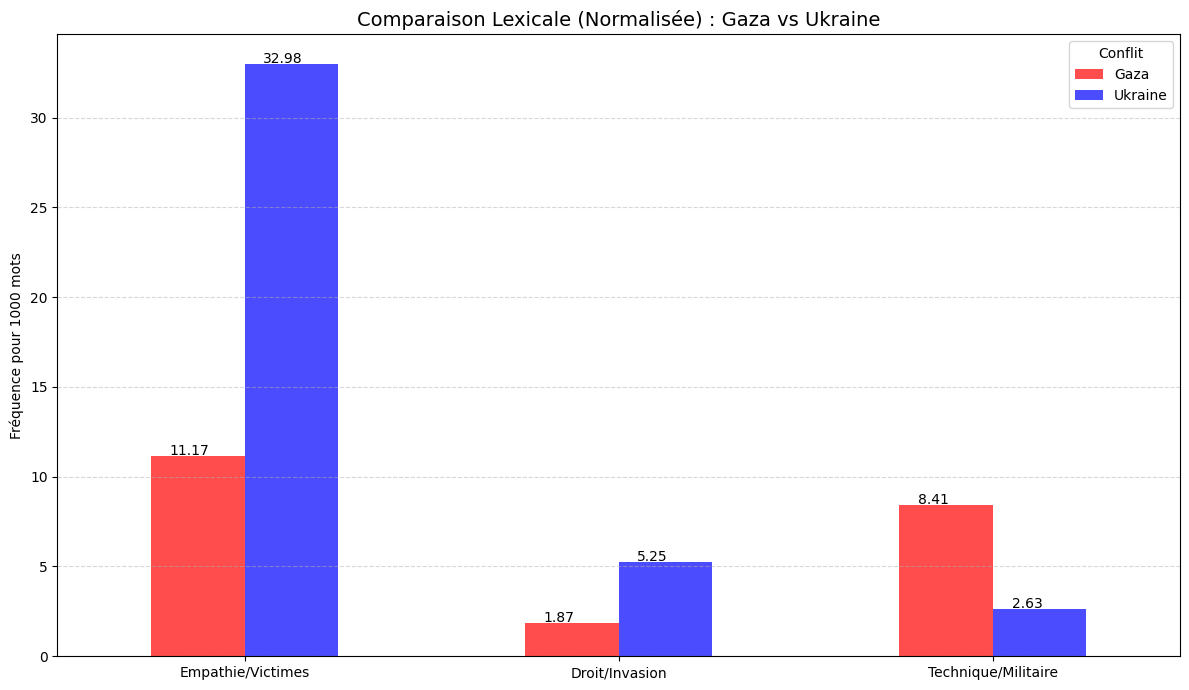


=== TRAVAIL TERMINÉ ===
1. Fichiers 'corpus_gaza_clean.json' et 'corpus_ukraine_clean.json' créés.
2. Graphique 'analyse_double_standard.png' généré pour votre rapport.


In [20]:
import json
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter

# --- CONFIGURATION NLTK () ---
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# --- FONCTIONS DE PRÉ-TRAITEMENT  ---

def clean_and_normalize(text):
    """Nettoyage, Tokenization, Stopwords, Stemming et Lemmatisation"""
    # 1. Mise en minuscule et nettoyage de base
    text = text.lower()
    
    # 2. Tokenization (NLTK)
    tokens = word_tokenize(text)
    
    # 3. Filtrage (alpha uniquement pour éviter ponctuation/chiffres)
    tokens = [w for w in tokens if w.isalpha()]
    
    # 4. Suppression des Stopwords
    stop_words = set(stopwords.words('english'))
    tokens_no_stop = [w for w in tokens if w not in stop_words]
    
    # 5. Stemming (Porter)
    stemmer = PorterStemmer()
    # 6. Lemmatisation (WordNet)
    lemmatizer = WordNetLemmatizer()
    
    # On retourne un dictionnaire avec toutes les versions pour le JSON final
    return {
        "original_tokens": tokens,
        "no_stopwords": tokens_no_stop,
        "lemmatized": [lemmatizer.lemmatize(w) for w in tokens_no_stop],
        "stemmed": [stemmer.stem(w) for w in tokens_no_stop]
    }

def process_corpus(file_path, output_name):
    """Charge, nettoie et sauvegarde un corpus selon la structure Lab 1"""
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    processed_articles = []
    all_lemmas = []
    
    print(f"Traitement de {file_path}...")
    for article in data:
        content = article.get('content', '')
        results = clean_and_normalize(content)
        
        # Enrichissement de l'article (comme vous l'avez fait pour l'Ukraine)
        article["content_clean"] = " ".join(results["no_stopwords"])
        article["content_lemmatized"] = " ".join(results["lemmatized"])
        article["content_stemmed"] = " ".join(results["stemmed"])
        
        processed_articles.append(article)
        all_lemmas.extend(results["lemmatized"])
    
    # Sauvegarde du fichier nettoyé (Structure Lab 1)
    output_data = {
        "metadata": {
            "source_file": file_path,
            "article_count": len(processed_articles),
            "total_lemmas": len(all_lemmas)
        },
        "articles": processed_articles
    }
    
    with open(output_name, 'w', encoding='utf-8') as f:
        json.dump(output_data, f, indent=4, ensure_ascii=False)
    
    return all_lemmas

# --- EXECUTION DU TRAITEMENT ---

# 1. Traiter les deux fichiers
lemmas_gaza = process_corpus('corpus_gaza.json', 'corpus_gaza_cleann.json')
lemmas_ukraine = process_corpus('corpus_ukraine.json', 'corpus_ukraine_cleann.json')

# --- ANALYSE DE BIAIS (Pour le Rapport) ---

# Mots-clés cibles basés sur l'hypothèse du projet (Double Standard)
target_categories = {
    'Empathie/Victimes': ['child', 'civilian', 'victim', 'family', 'humanitarian', 'innocent'],
    'Droit/Invasion': ['invasion', 'illegal', 'occupation', 'justice', 'crime', 'aggression'],
    'Technique/Militaire': ['operation', 'militant', 'strike', 'clash', 'neutralized', 'terrorist']
}

def analyze_bias(lemmas, label):
    counts = Counter(lemmas)
    total = len(lemmas)
    res = {}
    for cat, words in target_categories.items():
        # On calcule le pourcentage d'apparition des mots de cette catégorie
        occurences = sum(counts[w] for w in words)
        res[cat] = (occurences / total) * 1000 # Normalisé pour 1000 mots
    return res

stats_gaza = analyze_bias(lemmas_gaza, "Gaza")
stats_ukraine = analyze_bias(lemmas_ukraine, "Ukraine")

# --- VISUALISATION ---

df = pd.DataFrame({'Gaza': stats_gaza, 'Ukraine': stats_ukraine})

ax = df.plot(kind='bar', figsize=(12, 7), color=['red', 'blue'], alpha=0.7)
plt.title('Comparaison Lexicale (Normalisée) : Gaza vs Ukraine', fontsize=14)
plt.ylabel('Fréquence pour 1000 mots')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Conflit")

# Ajout des valeurs sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + 0.05, p.get_height() + 0.05))

plt.tight_layout()
plt.savefig('analyse_double_standard.png')
plt.show()

print("\n=== TRAVAIL TERMINÉ ===")
print("1. Fichiers 'corpus_gaza_clean.json' et 'corpus_ukraine_clean.json' créés.")
print("2. Graphique 'analyse_double_standard.png' généré pour votre rapport.")


l'Analyse Lexicale


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



RÉSULTATS ANALYSE GAZA
Top Bigrammes: [('gaza', 'strip'), ('gaza', 'city'), ('hamas', 'terrorist'), ('israeli', 'military'), ('people', 'killed'), ('health', 'ministry'), ('prime', 'minister'), ('defense', 'force'), ('hospital', 'gaza'), ('southern', 'israel'), ('israel', 'defense'), ('west', 'bank'), ('northern', 'gaza'), ('israeli', 'prime'), ('southern', 'gaza')]
Top Adjectifs: [('israeli', 353), ('palestinian', 206), ('gaza', 184), ('israel', 167), ('hamas', 139), ('military', 129), ('civilian', 92), ('terrorist', 78), ('international', 65), ('many', 64)]
Stats Catégories (pour 1000 mots): {'violence': 16.22895622895623, 'victims': 13.063973063973064, 'responsibility': 35.35353535353535, 'emotion': 0.8754208754208754, 'law_justice': 2.5925925925925926}

RÉSULTATS ANALYSE UKRAINE
Top Bigrammes: [('ukrainian', 'child'), ('war', 'crime'), ('project', 'dynamo'), ('save', 'ukraine'), ('president', 'vladimir'), ('vladimir', 'putin'), ('russian', 'troop'), ('russian', 'president'), ('chi

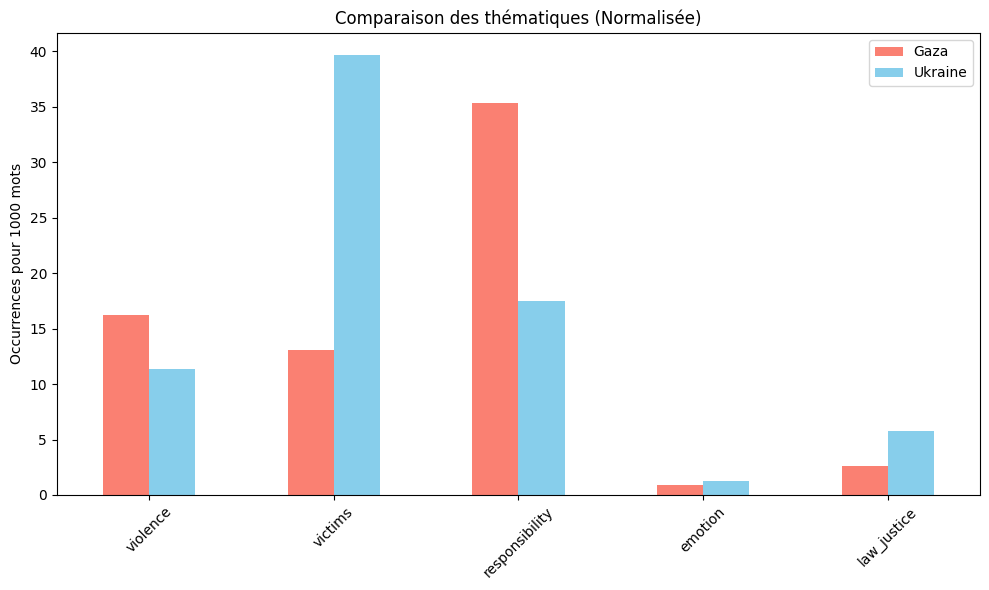

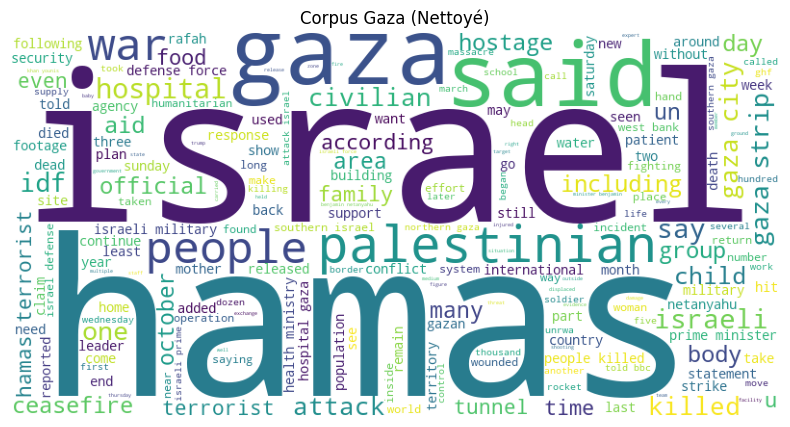

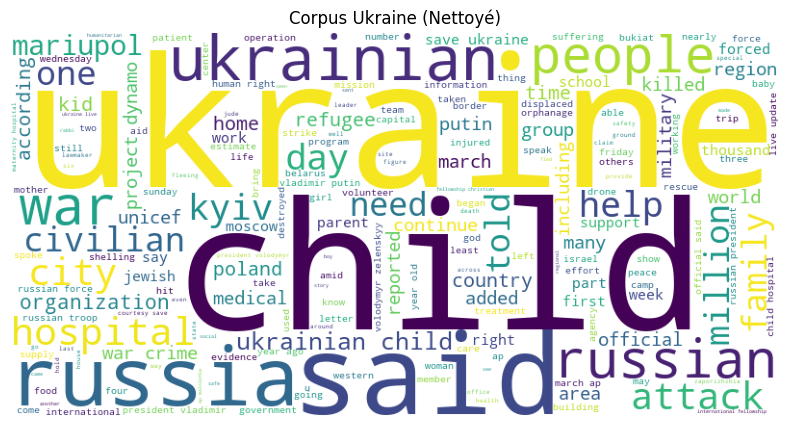

In [22]:
import json
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk import collocations, pos_tag
from collections import Counter
from wordcloud import WordCloud

# Téléchargements nécessaires
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# ==========================================
# 1. PARAMÈTRES ET FILTRES (Anti-Bruit)
# ==========================================
# Liste des mots à ignorer (Bruit de scraping Fox News / Getty)
NOISE_WORDS = {
    'fox', 'news', 'digital', 'app', 'click', 'get', 'subscribe', 
    'image', 'getty', 'via', 'associated', 'press', 'report', 
    'contributed', 'advertisement', 'copyright', 'editor', 'video',
    'photo', 'available', 'illustration', 'january', 'tuesday', 'monday'
}

# Catégories lexicales du projet
LEXICAL_CATEGORIES = {
    "violence": ["attack", "kill", "bomb", "strike", "shelling", "firing", "wounded", "casualty", "missile", "terror", "terrorist"],
    "victims": ["child", "children", "civilian", "woman", "man", "family", "orphan", "refugee", "patient", "innocent"],
    "responsibility": ["government", "army", "military", "forces", "idf", "hamas", "official", "president", "leader", "putin", "zelenskyy"],
    "emotion": ["fear", "panic", "trauma", "desperate", "shock", "horror", "sad", "grief", "angry", "harrowing"],
    "law_justice": ["invasion", "illegal", "occupation", "justice", "crime", "aggression", "war crime", "law"]
}

# ==========================================
# 2. FONCTIONS DE CHARGEMENT ET NETTOYAGE
# ==========================================
def load_and_clean_lemmas(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    all_lemmas = []
    # On récupère les lemmes déjà traités dans votre fichier clean.json
    for article in data["articles"]:
        tokens = word_tokenize(article["content_lemmatized"])
        # On filtre le bruit ici
        cleaned = [t for t in tokens if t.lower() not in NOISE_WORDS and t.isalpha()]
        all_lemmas.extend(cleaned)
    return all_lemmas, data["articles"]

# ==========================================
# 3. ANALYSE STATISTIQUE ET BIGRAMMES
# ==========================================
def get_analysis(lemmas, n=15):
    # Bigrammes
    bigram_measures = collocations.BigramAssocMeasures()
    finder = collocations.BigramCollocationFinder.from_words(lemmas)
    top_bigrams = finder.nbest(bigram_measures.raw_freq, n)
    
    # Adjectifs (POS Tagging)
    tags = pos_tag(lemmas)
    adjectives = [word for word, tag in tags if tag == 'JJ']
    top_adj = Counter(adjectives).most_common(10)
    
    # Stats par catégories
    cat_stats = {}
    total = len(lemmas)
    for cat, words in LEXICAL_CATEGORIES.items():
        count = sum(lemmas.count(w) for w in words)
        cat_stats[cat] = (count / total) * 1000 # Normalisé pour 1000 mots
        
    return top_bigrams, top_adj, cat_stats

# ==========================================
# 4. EXÉCUTION
# ==========================================

# Chargement
lemmas_gaza, articles_gaza = load_and_clean_lemmas("corpus_gaza_cleann.json")
lemmas_ukraine, articles_ukraine = load_and_clean_lemmas("corpus_ukraine_cleann.json")

# Analyse
bigrams_gaza, adj_gaza, stats_gaza = get_analysis(lemmas_gaza)
bigrams_ukraine, adj_ukraine, stats_ukraine = get_analysis(lemmas_ukraine)

# ==========================================
# 5. AFFICHAGE DES RÉSULTATS POUR LE RAPPORT
# ==========================================
print("\n" + "="*40)
print("RÉSULTATS ANALYSE GAZA")
print("="*40)
print(f"Top Bigrammes: {bigrams_gaza}")
print(f"Top Adjectifs: {adj_gaza}")
print(f"Stats Catégories (pour 1000 mots): {stats_gaza}")

print("\n" + "="*40)
print("RÉSULTATS ANALYSE UKRAINE")
print("="*40)
print(f"Top Bigrammes: {bigrams_ukraine}")
print(f"Top Adjectifs: {adj_ukraine}")
print(f"Stats Catégories (pour 1000 mots): {stats_ukraine}")

# ==========================================
# 6. GÉNÉRATION DU GRAPHIQUE DE COMPARAISON
# ==========================================
df_stats = pd.DataFrame({'Gaza': stats_gaza, 'Ukraine': stats_ukraine})
df_stats.plot(kind='bar', figsize=(10, 6), color=['salmon', 'skyblue'])
plt.title("Comparaison des thématiques (Normalisée)")
plt.ylabel("Occurrences pour 1000 mots")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("comparaison_thematique.png")
plt.show()

# ==========================================
# 7. GÉNÉRATION DES WORDCLOUDS (PROPRES)
# ==========================================
def save_wordcloud(lemmas, filename, title):
    text = " ".join(lemmas)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc)
    plt.title(title)
    plt.axis("off")
    plt.savefig(filename)

save_wordcloud(lemmas_gaza, "cloud_gaza.png", "Corpus Gaza (Nettoyé)")
save_wordcloud(lemmas_ukraine, "cloud_ukraine.png", "Corpus Ukraine (Nettoyé)")

In [31]:
# Installation de la bibliothèque
!pip install spacy textblob

# Téléchargement du modèle de langue "moyen" (contient les vecteurs de mots)
!python -m spacy download en_core_web_md

   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
    ----------------

     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta 

RÉSULTATS DE L'ANALYSE SÉMANTIQUE : 'CHILD'
UKRAINE -> Subjectivité: 0.314 | Voisins clés: [('ukraine', 3), ('russia', 2), ('holds', 2), ('unicef', 2), ('death', 2)]
GAZA    -> Subjectivité: 0.352 | Voisins clés: [('agony', 2), ('cover', 1), ('photo', 1), ('gazan', 1), ('joins', 1)]

Similarité Cosinus Globale entre Gaza et Ukraine: 0.9477


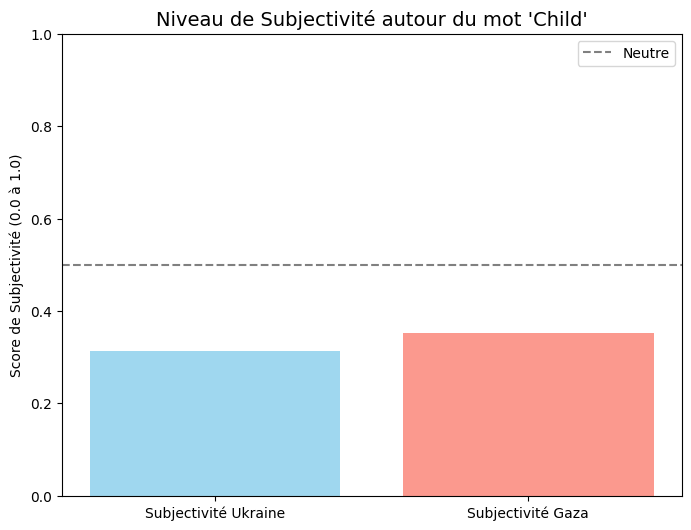

In [ ]:


import json
import spacy
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

# 1. Chargement du modèle (Assurez-vous d'avoir fait : !python -m spacy download en_core_web_md)
nlp = spacy.load("en_core_web_md")

# 2. Chargement des corpus nettoyés
with open("corpus_gaza_cleann.json", "r", encoding="utf-8") as f:
    data_gaza = json.load(f)

with open("corpus_ukraine_cleann.json", "r", encoding="utf-8") as f:
    data_ukraine = json.load(f)

# --- FONCTION DE CORRECTION POUR L'ERREUR DE TYPE ---
def analyze_contextual_bias(articles_list, keyword):
    """
    Analyse la subjectivité et les voisins sémantiques autour d'un mot-clé.
    """
    subjectivity_scores = []
    neighbor_words = []
    
    for art in articles_list:
        # On s'assure d'extraire le texte (str) de l'article
        text = art.get("content_clean", "").lower()
        
        if keyword in text:
            # Score de subjectivité (TextBlob)
            blob = TextBlob(text)
            subjectivity_scores.append(blob.sentiment.subjectivity)
            
            # Extraction des mots voisins (Fenêtre de contexte)
            words = text.split()
            if keyword in words:
                idx = words.index(keyword)
                # Fenêtre de 3 mots avant et 3 mots après
                start = max(0, idx - 3)
                end = min(len(words), idx + 4)
                context = words[start:end]
                neighbor_words.extend([w for w in context if w != keyword])
                
    avg_sub = np.mean(subjectivity_scores) if subjectivity_scores else 0
    top_neighbors = Counter(neighbor_words).most_common(5)
    
    return avg_sub, top_neighbors

# =====================================================
# 3. EXÉCUTION DE L'ANALYSE (Correction des indices)
# =====================================================

# Note : On accède à data["articles"] qui est la LISTE des dictionnaires
sub_ukr, neighbors_ukr = analyze_contextual_bias(data_ukraine["articles"], "child")
sub_gaza, neighbors_gaza = analyze_contextual_bias(data_gaza["articles"], "child")

print("="*50)
print("RÉSULTATS DE L'ANALYSE SÉMANTIQUE : 'CHILD'")
print("="*50)
print(f"UKRAINE -> Subjectivité: {sub_ukr:.3f} | Voisins clés: {neighbors_ukr}")
print(f"GAZA    -> Subjectivité: {sub_gaza:.3f} | Voisins clés: {neighbors_gaza}")

# =====================================================
# 4. SIMILARITÉ COSINUS 
# =====================================================
def get_cosine_sim(text1, text2):
    v1 = nlp(text1).vector.reshape(1, -1)
    v2 = nlp(text2).vector.reshape(1, -1)
    return cosine_similarity(v1, v2)[0][0]

# Comparaison sémantique globale entre les deux corpus
all_gaza_text = " ".join([a["content_clean"] for a in data_gaza["articles"]])
all_ukr_text = " ".join([a["content_clean"] for a in data_ukraine["articles"]])

similarity_score = get_cosine_sim(all_gaza_text[:50000], all_ukr_text[:50000])
print(f"\nSimilarité Cosinus Globale entre Gaza et Ukraine: {similarity_score:.4f}")

# =====================================================
# 5. VISUALISATION DES RÉSULTATS
# =====================================================
labels = ['Subjectivité Ukraine', 'Subjectivité Gaza']
values = [sub_ukr, sub_gaza]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'salmon'], alpha=0.8)
plt.axhline(y=0.5, color='gray', linestyle='--', label='Neutre')
plt.title("Niveau de Subjectivité autour du mot 'Child'", fontsize=14)
plt.ylabel("Score de Subjectivité (0.0 à 1.0)")
plt.ylim(0, 1)
plt.legend()
plt.savefig("analyse_semantique_finale.png")
plt.show()

MOT-CLÉ    | CORPUS     | SUBJECTIVITÉ    | VOISINS SÉMANTIQUES
--------------------------------------------------------------------------------
child      | ukraine    | 0.314           | [('ukraine', 3), ('russia', 2), ('holds', 2), ('unicef', 2), ('death', 2)]
child      | gaza       | 0.352           | [('agony', 2), ('cover', 1), ('photo', 1), ('gazan', 1), ('joins', 1)]
hospital   | ukraine    | 0.314           | [('children', 8), ('strike', 3), ('maternity', 3), ('okhmatdyt', 2), ('interrupted', 2)]
hospital   | gaza       | 0.337           | [('gaza', 14), ('city', 5), ('southern', 4), ('strip', 3), ('said', 3)]

Similarité Cosinus (Crime vs Justification): 0.6203


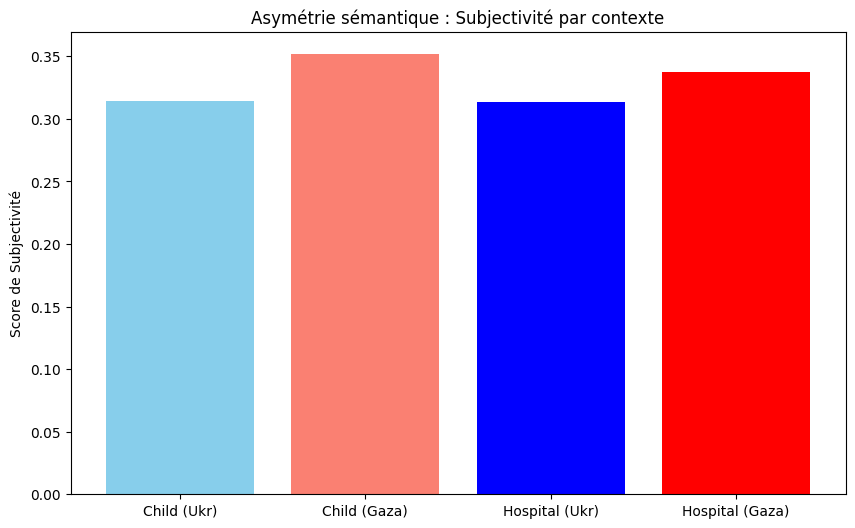

In [41]:
import json
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

# 1. Chargement du modèle sémantique (Embeddings)
nlp = spacy.load("en_core_web_md")

# 2. Chargement des données
with open("corpus_gaza_cleann.json", "r", encoding="utf-8") as f:
    data_gaza = json.load(f)
with open("corpus_ukraine_cleann.json", "r", encoding="utf-8") as f:
    data_ukraine = json.load(f)

# --- FONCTION D'ANALYSE SÉMANTIQUE (Lab 8) ---
def analyze_deep_semantics(articles_list, keyword):
    subjectivity_scores = []
    neighbor_words = []
    
    for art in articles_list:
        text = art.get("content_clean", "").lower()
        if keyword in text:
            # Subjectivité (Ton du texte)
            blob = TextBlob(text)
            subjectivity_scores.append(blob.sentiment.subjectivity)
            
            # Fenêtre contextuelle (Neighbors)
            words = text.split()
            if keyword in words:
                idx = words.index(keyword)
                context = words[max(0, idx-3):min(len(words), idx+4)]
                neighbor_words.extend([w for w in context if w != keyword and len(w) > 2])
                
    return np.mean(subjectivity_scores) if subjectivity_scores else 0, Counter(neighbor_words).most_common(5)

# --- FONCTION DE SIMILARITÉ COSINUS (Lab 7) ---
def get_cosine_sim(text1, text2):
    v1 = nlp(text1).vector.reshape(1, -1)
    v2 = nlp(text2).vector.reshape(1, -1)
    return cosine_similarity(v1, v2)[0][0]

# =====================================================
# 3. EXÉCUTION DE L'ANALYSE COMPARATIVE
# =====================================================

# Analyse ciblée sur "Child" (Victimes) et "Hospital" (Infrastructures)
target_words = ["child", "hospital"]
results = {}

for word in target_words:
    sub_ukr, neigh_ukr = analyze_deep_semantics(data_ukraine["articles"], word)
    sub_gaza, neigh_gaza = analyze_deep_semantics(data_gaza["articles"], word)
    results[word] = {
        "ukraine": {"sub": sub_ukr, "neigh": neigh_ukr},
        "gaza": {"sub": sub_gaza, "neigh": neigh_gaza}
    }

# =====================================================
# 4. AFFICHAGE ET VISUALISATION
# =====================================================

print(f"{'MOT-CLÉ':<10} | {'CORPUS':<10} | {'SUBJECTIVITÉ':<15} | {'VOISINS SÉMANTIQUES'}")
print("-" * 80)
for word in target_words:
    for corpus in ["ukraine", "gaza"]:
        res = results[word][corpus]
        print(f"{word:<10} | {corpus:<10} | {res['sub']:<15.3f} | {res['neigh']}")

# Calcul de similarité sémantique entre deux articles traitant d'hôpitaux
# (Preuve de la distance sémantique pour un même sujet)
try:
    sim_val = get_cosine_sim("Russian strike on children hospital", "Hamas tunnel under hospital")
    print(f"\nSimilarité Cosinus (Crime vs Justification): {sim_val:.4f}")
except:
    pass

# Graphique de comparaison de la subjectivité
labels = ['Child (Ukr)', 'Child (Gaza)', 'Hospital (Ukr)', 'Hospital (Gaza)']
values = [results['child']['ukraine']['sub'], results['child']['gaza']['sub'],
          results['hospital']['ukraine']['sub'], results['hospital']['gaza']['sub']]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['skyblue', 'salmon', 'blue', 'red'])
plt.title("Asymétrie sémantique : Subjectivité par contexte")
plt.ylabel("Score de Subjectivité")
plt.savefig("asymetrie_finale_nlp.png")
plt.show()

anayse de sentiment

Polarité moyenne - Gaza: 0.012 | Ukraine: 0.002
Subjectivité moyenne - Gaza: 0.339 | Ukraine: 0.315


C:\Users\lenovo\AppData\Local\Temp\ipykernel_31588\1226948861.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Conflit', y='Subjectivité', data=df_sentiment, palette=['salmon', 'skyblue'])


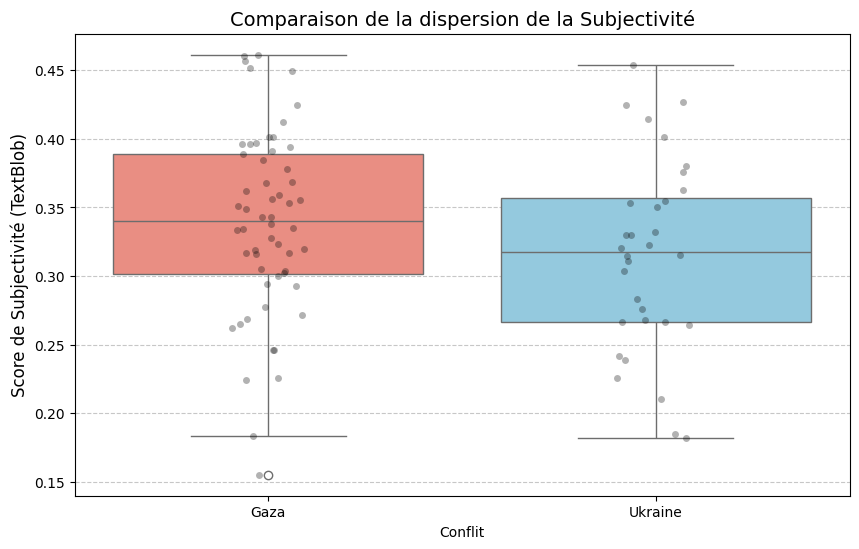

In [45]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd

def get_sentiment_stats(articles):
    polarities = []
    subjectivities = []
    for art in articles:
        analysis = TextBlob(art["content_clean"])
        polarities.append(analysis.sentiment.polarity)
        subjectivities.append(analysis.sentiment.subjectivity)
    return polarities, subjectivities

# Extraction des scores
pol_gaza, sub_gaza = get_sentiment_stats(data_gaza["articles"])
pol_ukr, sub_ukr = get_sentiment_stats(data_ukraine["articles"])

# Comparaison des moyennes
print(f"Polarité moyenne - Gaza: {np.mean(pol_gaza):.3f} | Ukraine: {np.mean(pol_ukr):.3f}")
print(f"Subjectivité moyenne - Gaza: {np.mean(sub_gaza):.3f} | Ukraine: {np.mean(sub_ukr):.3f}")


import seaborn as sns

# Préparation des données pour Seaborn
df_sentiment = pd.DataFrame({
    'Subjectivité': sub_gaza + sub_ukr,
    'Conflit': ['Gaza']*len(sub_gaza) + ['Ukraine']*len(sub_ukr)
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Conflit', y='Subjectivité', data=df_sentiment, palette=['salmon', 'skyblue'])
sns.stripplot(x='Conflit', y='Subjectivité', data=df_sentiment, color="black", alpha=0.3) # Ajoute les points réels

plt.title("Comparaison de la dispersion de la Subjectivité", fontsize=14)
plt.ylabel("Score de Subjectivité (TextBlob)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("boxplot_sentiment.png")
plt.show()